In [ ]:
!pip install torch torchvision opencv-python-headless numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import cv2
import numpy as np
import torch
from google.colab import files
from google.colab.patches import cv2_imshow

In [ ]:
print("Please upload an image containing vehicles (bikes, cars, auto-rickshaws, trucks):")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded image filename
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image failed to load. Please upload a valid image file.")

Please upload an image containing vehicles (bikes, cars, auto-rickshaws, trucks):


Saving Compact-Sedans-Sales-Report-Dec-2020.webp to Compact-Sedans-Sales-Report-Dec-2020.webp


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5m', pretrained=True)  # Use medium model for better accuracy

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-3-19 Python-3.11.11 torch-2.6.0+cu124 CPU

100%|██████████| 40.8M/40.8M [00:00<00:00, 188MB/s]

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


In [ ]:
# Convert BGR (OpenCV format) to RGB (YOLOv5 format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Run inference with adjusted confidence and NMS thresholds
model.conf = 0.3  # Lower confidence threshold to detect more objects
model.iou = 0.5   # NMS IoU threshold to reduce overlapping boxes
results = model(image_rgb)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
# Vehicle categories in YOLOv5 (COCO dataset)
vehicle_classes = {
    "bicycle": "Bikes",
    "car": "Cars",
    "motorcycle": "Auto/Motorbikes",  # Auto-rickshaws may be detected as motorcycles
    "truck": "Trucks",
    "bus": "Trucks"  # Include buses as trucks for this context
}

# Initialize counters
counts = {"Bikes": 0, "Cars": 0, "Auto/Motorbikes": 0, "Trucks": 0}

In [ ]:
# Get detections in pandas DataFrame format
detections = results.pandas().xyxy[0]

# Process each detection
for index, row in detections.iterrows():
    label = row['name']
    confidence = row['confidence']
    if label in vehicle_classes:  # No confidence threshold here since model.conf is set
        # Update count
        counts[vehicle_classes[label]] += 1
        # Draw bounding box
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        color = (0, 255, 0)  # Green
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f"{label} {confidence:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


Vehicle Counts:
Bikes: 0
Cars: 5
Auto/Motorbikes: 0 (Note: Auto-rickshaws may be counted here)
Trucks: 0


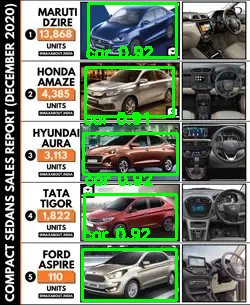

In [ ]:
# Print counts
print("\nVehicle Counts:")
print(f"Bikes: {counts['Bikes']}")
print(f"Cars: {counts['Cars']}")
print(f"Auto/Motorbikes: {counts['Auto/Motorbikes']} (Note: Auto-rickshaws may be counted here)")
print(f"Trucks: {counts['Trucks']}")

# Display the image with detections
cv2_imshow(image)

In [ ]:
cv2.imwrite("output_image.jpg", image)
print("Output image saved as 'output_image.jpg'. You can download it from the Colab file explorer.")

Output image saved as 'output_image.jpg'. You can download it from the Colab file explorer.
